In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from pandas.plotting import scatter_matrix
# Importing Libaries

In [ ]:
from google.colab import files
uploaded = files.upload()
# Upload the csv, a promt will appear and you will need to upload the Auto.csv file from your local drive.

Saving Auto.csv to Auto (1).csv


In [ ]:
dfo =pd.read_csv('Auto.csv')
print(df)
# Load the csv and assign in to df.

      mpg  cylinders  displacement horsepower  weight  acceleration  year  \
0    18.0          8         307.0        130    3504          12.0    70   
1    15.0          8         350.0        165    3693          11.5    70   
2    18.0          8         318.0        150    3436          11.0    70   
3    16.0          8         304.0        150    3433          12.0    70   
4    17.0          8         302.0        140    3449          10.5    70   
..    ...        ...           ...        ...     ...           ...   ...   
392  27.0          4         140.0         86    2790          15.6    82   
393  44.0          4          97.0         52    2130          24.6    82   
394  32.0          4         135.0         84    2295          11.6    82   
395  28.0          4         120.0         79    2625          18.6    82   
396  31.0          4         119.0         82    2720          19.4    82   

     origin                       name  
0         1  chevrolet chevelle ma

In [ ]:
df = pd.read_csv("Auto.csv", na_values = ["?"])
# Drop the rows which contain missing values (safe to do since we've worked with this data in a previous lab)
df.dropna(inplace = True)
# Check the dimensions of the dataframe
df.shape

(392, 9)

In [ ]:
df.head()
# A previewe of the data set

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [ ]:
# We compute the range of each quantitive predictor, while changing some that seem numeric to categorical
df['cylinders'] = df['cylinders'].astype('category')
df['year'] = df['year'].astype('category')
df['origin'] = df['origin'].astype('category')
auto_max = df.loc[:, ["mpg", "displacement", "horsepower", "weight", "acceleration"]].max(axis = 0)
auto_min = df.loc[:, ["mpg", "displacement", "horsepower", "weight", "acceleration"]].min(axis = 0)
auto_range = auto_max - auto_min
# Generate a dataframe with the max, min, and range of each quantitative variable for better undersrtanding
pd.DataFrame({"max":auto_max, "min":auto_min, "range":auto_range})

,max,min,range
mpg,46.6,9.0,37.6
displacement,455.0,68.0,387.0
horsepower,230.0,46.0,184.0
weight,5140.0,1613.0,3527.0
acceleration,24.8,8.0,16.8


In [ ]:
df.describe()
# Among other information we can see the mean and the sd of each numeric variable

,mpg,displacement,horsepower,weight,acceleration
count,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,194.411990,104.469388,2977.584184,15.541327
std,7.805007,104.644004,38.491160,849.402560,2.758864
min,9.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.000000,105.000000,75.000000,2225.250000,13.775000
50%,22.750000,151.000000,93.500000,2803.500000,15.500000
75%,29.000000,275.750000,126.000000,3614.750000,17.025000
max,46.600000,455.000000,230.000000,5140.000000,24.800000


In [ ]:
# Reset the index of the df data frame
df.reset_index(drop = True, inplace = True)
# We create dataframe in which the 10th through 85th observations are dropped
df_dropped = df.drop(index = list(range(9, 85)))
# Compute max, min, range, mean, and standard deviation for each quantitative variable
dropped_max = df_dropped.loc[:, "mpg":"year"].max(axis = 0)
dropped_min = df_dropped.loc[:, "mpg":"year"].min(axis = 0)
dropped_range = dropped_max - dropped_min
dropped_mean = df_dropped.loc[:, "mpg":"year"].mean(axis = 0)
dropped_sd = df_dropped.loc[:, "mpg":"year"].std(axis = 0)
# Generate a dataframe with the max, min, range, mean, and standard deviation for each quantitative variable
# Again note that the describe() function would provide all of these values except for the range
pd.DataFrame({"max":dropped_max, "min":dropped_min, "range":dropped_range, "mean":dropped_mean, "std dev":dropped_sd})
# In our calculation we included the categorical variables, as python seems exclude them


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Dropping of nuisance columns in DataFrame

,max,min,range,mean,std dev
mpg,46.6,11.0,35.6,24.404430,7.867283
displacement,455.0,68.0,387.0,187.240506,99.678367
horsepower,230.0,46.0,184.0,100.721519,35.708853
weight,4997.0,1649.0,3348.0,2935.971519,811.300208
acceleration,24.8,8.5,16.3,15.726899,2.693721


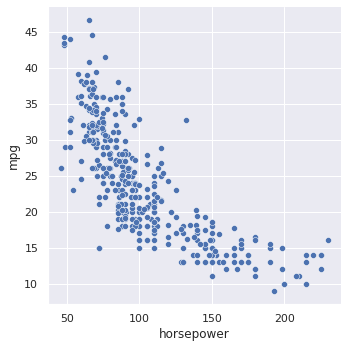

In [ ]:
# Create scatter plot for the relationship between horsepower and mpg
g = sns.relplot(x = "horsepower", y = "mpg", data = df)
plt.show()

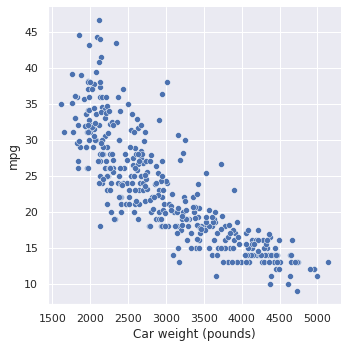

In [ ]:
# Create scatter plot for the relationship between car weight and mpg
g = sns.relplot(x = "weight", y = "mpg",data = df)
g.set(xlabel = "Car weight (pounds)")
plt.show()

In [ ]:
dfc = pd.DataFrame(df, columns=["mpg", "displacement", "horsepower", "weight", "acceleration"])
corrMatrix = dfc.corr()
print (corrMatrix)
# #As we can see in the corr output, mpg has a great correlation with displacement horsepower and weight but not so much with acceleration.
# In conclusion the above variables can be used as predictors. With further investigation some of the factor variables can be included.


                   mpg  displacement  horsepower    weight  acceleration
mpg           1.000000     -0.805127   -0.778427 -0.832244      0.423329
displacement -0.805127      1.000000    0.897257  0.932994     -0.543800
horsepower   -0.778427      0.897257    1.000000  0.864538     -0.689196
weight       -0.832244      0.932994    0.864538  1.000000     -0.416839
acceleration  0.423329     -0.543800   -0.689196 -0.416839      1.000000


END